**LOGISTIC REGRESSION MODEL**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique,  it gives the probabilistic values which lie between 0 and 1.





**Importing necessary libraries**

Both Pandas and NumPy provide a wide range of functions for manipulating and analyzing data, including functions for handling missing data, grouping data, merging datasets, and filtering data.

Matplotlib is a popular Python library used for creating visualizations and plots.

Seaborn is a popular Python library for creating statistical visualizations







In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading & Reading the dataset**

Used Breast cancer dataset to predict the number of patients having cancer.

In [2]:
df=pd.read_csv("/content/Breast_cancer_data.csv")

In [3]:
df.shape

(569, 6)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


**Data Preprocessing**

In [5]:
#Cheaking for null Values in the dataset
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [32]:
#checking for outliers
def find_outliers_IQR(df):
  Q1 = np.percentile(df, 25)
  Q3 = np.percentile(df, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outliers = df[(df > lower_bound) | (df < upper_bound)]
  return outliers, Q1, Q3, IQR

In [33]:
outliers=find_outliers_IQR(df)
print(outliers)

(     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2          

In [8]:
df.shape

(569, 6)

**Data Visualization**

It can help us better understand data, communicate findings, identify outliers and anomalies, support better decision-making, and facilitate exploratory data analysis.

In [11]:
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

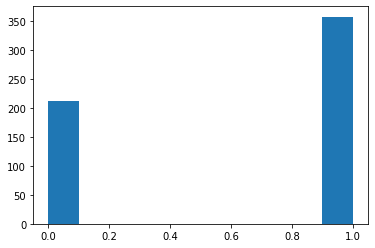

In [9]:
df.describe()
plt.hist(df['diagnosis'])
plt.show()

The above code is using the Pandas and Matplotlib libraries to generate descriptive statistics and a histogram of the 'diagnosis' variable in the Dataset

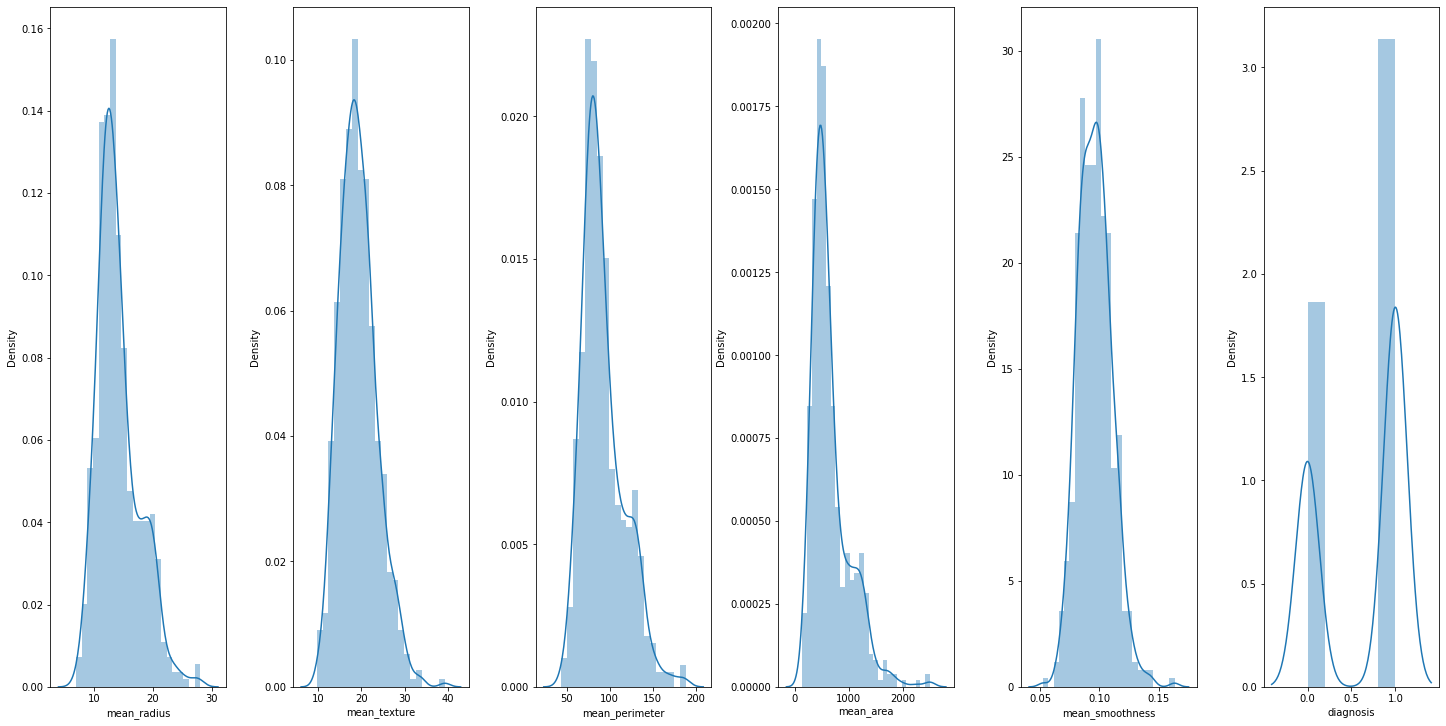

In [12]:
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The above code is using the Matplotlib and Seaborn libraries to create a grid of six histograms, one for each column in the Dataset

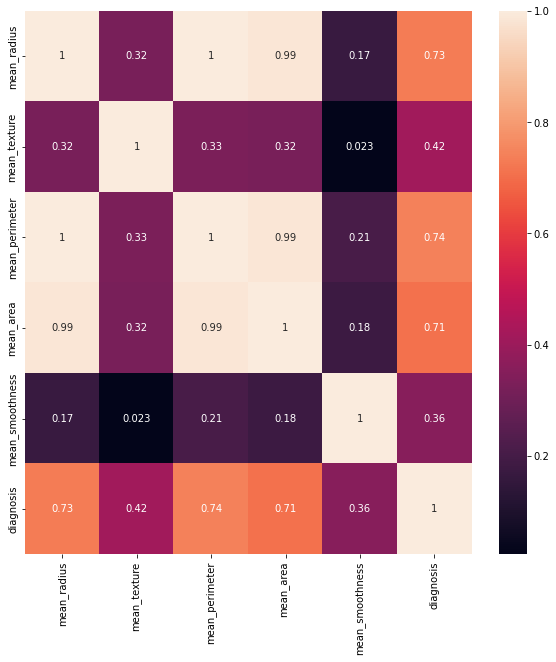

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr().abs(),  annot=True)

The above code is using the Matplotlib and Seaborn libraries to create a heatmap of the correlation matrix between the columns of the Dataset.

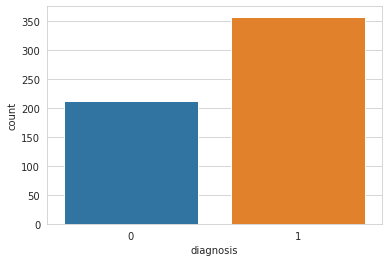

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

The above code is using the Seaborn library to create a count plot of the diagnosis variable in the Dataset.

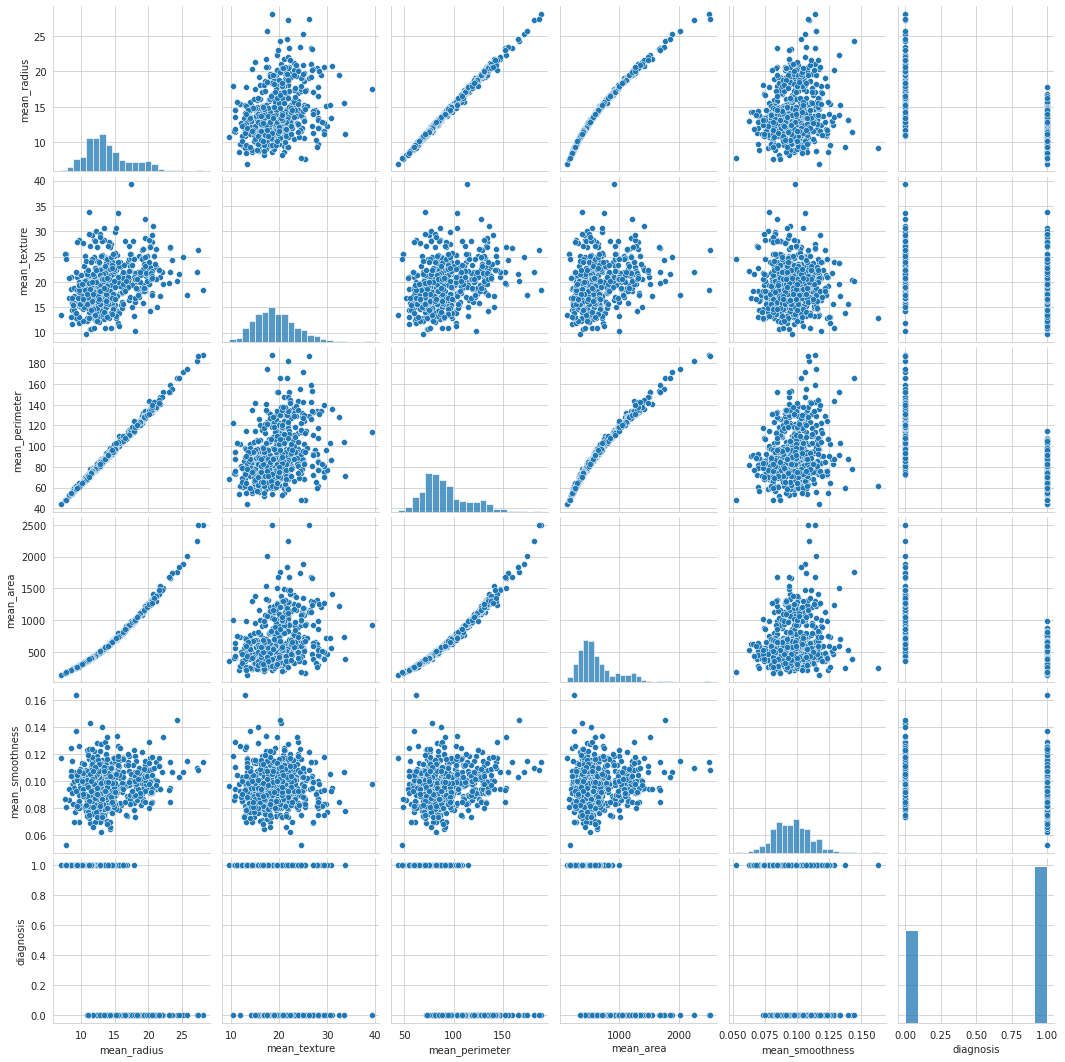

In [16]:
sns.pairplot(df)
plt.show()

The above code is using the Seaborn library to create a pair plot of the dataset.

Pair plots are a useful tool for exploring relationships between variables in a dataset. They can help identify potential correlations or patterns in the data.

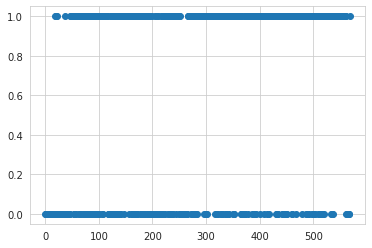

In [17]:
plt.scatter(df.index, df['diagnosis'])
plt.show()

The above code is using the Matplotlib library to create a scatter plot of the diagnosis column in the Dataset

**Feature Engineering**

Feature engineering is the process of transforming raw data into features that can be used by machine learning models to make accurate predictions.

In [21]:
#split the data into two parts: the features (X) and the target variable (y)
X=df.drop(columns='diagnosis')
y = df.diagnosis

By splitting the data into features and target variable, we can train a machine learning model to learn the relationship between the features and the target variable. We can then use this model to make predictions on new data where we know the features but not the target variable.

In [23]:
#splitting the dataset to train and test data
split_ratio = 0.8
n = len(X)
train_data = int(n * split_ratio)
test_data = n - train_data
X_train = X[:train_data]
y_train = y[:train_data]
X_test = X[train_data:]
y_test = y[train_data:]

**Model Training**

Defining the logistic Regression function to train the model.


**Logistic Regression Overview :**
**Equations :**

**sigmoid function**

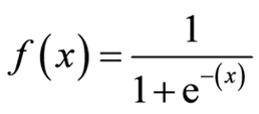
 
 
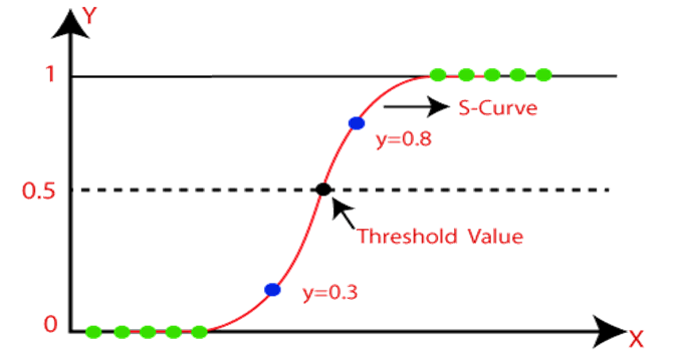

**Cost function :**
 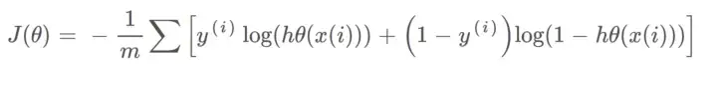

**Gradient Descent**
 
 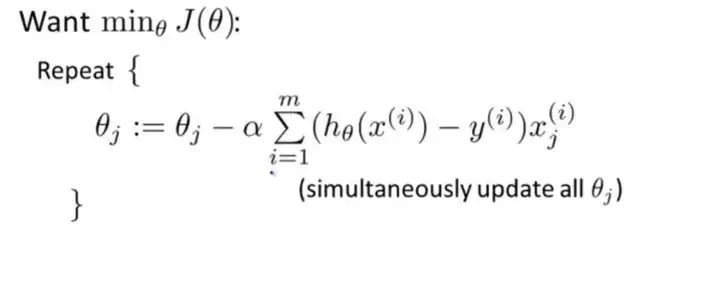

 





In [24]:
#sigmoid function
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [26]:
#Logistic Regressio function
class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [27]:
#model training
model = LogisticRegression()
model.fit(X_train, y_train)

In [29]:
#predicting the model
y_pred = model.predict(X_test)

In [30]:
#calculatting the error 
mse = np.mean((y_test - y_pred)**2)
print("MSE:", mse)

MSE: 0.32456140350877194
